In [1]:
import pandas as pd
import matplotlib.pyplot as plt


 1. Load the dataset

In [2]:
df=pd.read_csv('data/loan_data.csv') 
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

2. Check for null values in the dataset

In [4]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

3. Print percentage of default to payer of the dataset for the TARGET column

In [5]:
defaulters=(df.TARGET==1).sum()
payers=(df.TARGET==0).sum()
print((defaulters/payers)*100)

8.781828601345662


In [6]:
# checking duplicates

without_id=[column for column in df.columns if column!='SK_ID_CURR'] 

#check for duplicate values
na=df[df.duplicated(subset=without_id,keep=False)] 
print("Duplicates are: ",na.shape[0])

Duplicates are:  0


4. Balance the dataset if the data is imbalanced

In [7]:
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='TARGET'>

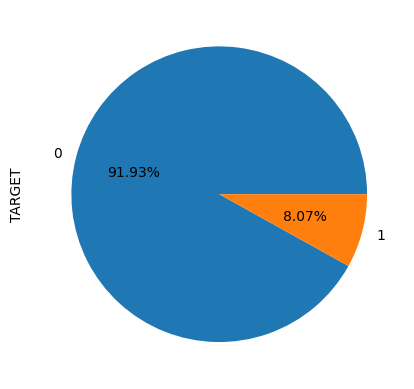

In [8]:
df.TARGET.value_counts().plot(kind='pie',autopct='%1.2f%%')

In [9]:
#4. Balance the dataset if the data is imbalanced
# random under sampling 
shuffled_data=df.sample(frac=1,random_state=3)
unpaid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==1] 
paid_home_loan=shuffled_data.loc[shuffled_data['TARGET']==0].sample(n=24825,random_state=69)
normalised_home_loan=pd.concat([unpaid_home_loan,paid_home_loan])
print('class 0:', paid_home_loan.shape)
print('class 1:', unpaid_home_loan.shape)

class 0: (24825, 122)
class 1: (24825, 122)


5. Plot the balanced data or imbalanced data

<AxesSubplot:ylabel='TARGET'>

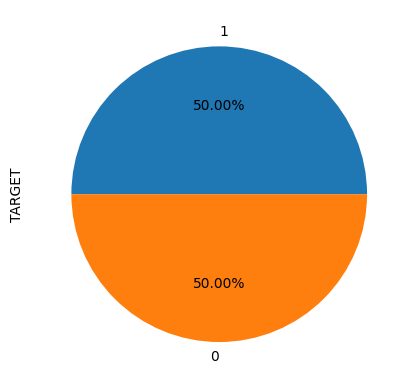

In [10]:
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.2f%%")

In [11]:
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [12]:
normalised_home_loan.dropna(axis=0)
normalised_home_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49650 entries, 207339 to 121862
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 46.6+ MB


In [13]:
normalised_home_loan.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7648
AMT_REQ_CREDIT_BUREAU_WEEK    7648
AMT_REQ_CREDIT_BUREAU_MON     7648
AMT_REQ_CREDIT_BUREAU_QRT     7648
AMT_REQ_CREDIT_BUREAU_YEAR    7648
Length: 122, dtype: int64

In [14]:
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_DAY)) 
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_WEEK))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_MON))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_QRT))
print(pd.unique(normalised_home_loan.AMT_REQ_CREDIT_BUREAU_YEAR))

[ 0. nan  1.  2.  4.  3.  9.]
[ 0. nan  1.  2.  4.  3.  5.  6.]
[ 0. nan  1.  3.  5.  9.  2.  6.  8.  4. 11. 12.  7. 13. 10. 17. 15. 14.
 16. 18. 27.]
[ 0. nan  2.  3.  1.  4.  5.  6. 19.  7.]
[ 3.  0. nan  1.  5.  4.  2.  6.  7.  8.  9. 10. 14. 13. 12. 11. 22. 16.
 23. 17.]


In [15]:
normalised_home_loan.dropna(axis=0)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
279124,423360,1,Cash loans,M,Y,N,1,157500.0,1125000.0,33025.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
216116,350411,1,Cash loans,M,Y,N,0,112500.0,225000.0,25447.5,...,0,0,0,0,0.0,0.0,1.0,1.0,0.0,1.0
133687,255050,1,Cash loans,M,Y,N,1,337500.0,704844.0,26977.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
4159,104863,1,Cash loans,M,Y,N,0,265500.0,521280.0,28408.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
208602,341779,1,Cash loans,F,Y,Y,1,247500.0,544491.0,17694.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108677,226053,0,Cash loans,M,Y,Y,0,135000.0,679500.0,36333.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
258603,399273,0,Revolving loans,M,Y,Y,1,450000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
51880,160079,0,Cash loans,M,Y,Y,0,202500.0,750649.5,53514.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
282820,427561,0,Cash loans,F,Y,N,0,270000.0,1800000.0,62568.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0


<AxesSubplot:ylabel='TARGET'>

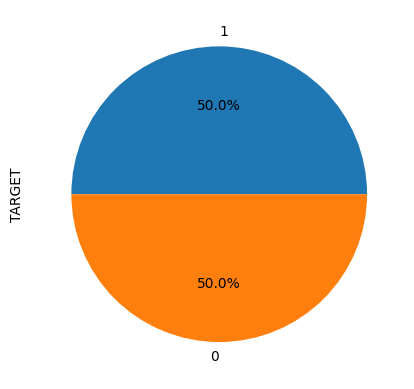

In [16]:
normalised_home_loan.TARGET.value_counts().plot(kind='pie',autopct="%1.1f%%")

<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

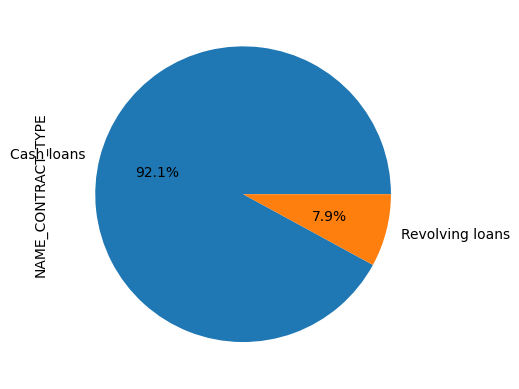

In [17]:
normalised_home_loan.NAME_CONTRACT_TYPE.value_counts().plot(kind='pie',autopct="%1.1f%%") 

<AxesSubplot:ylabel='CODE_GENDER'>

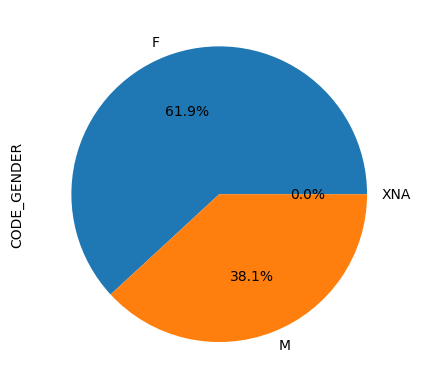

In [18]:
normalised_home_loan.CODE_GENDER.value_counts().plot(kind='pie',autopct="%1.1f%%") 
#roughly equal amount


<AxesSubplot:ylabel='FLAG_OWN_CAR'>

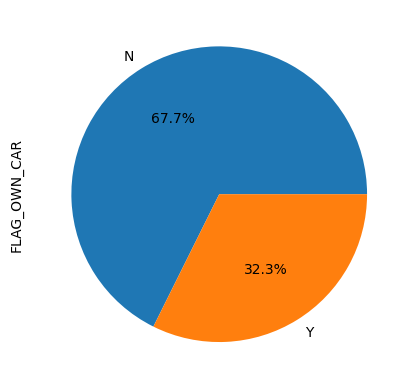

In [19]:
normalised_home_loan.FLAG_OWN_CAR.value_counts().plot(kind='pie',autopct="%1.1f%%")

<AxesSubplot:ylabel='CNT_CHILDREN'>

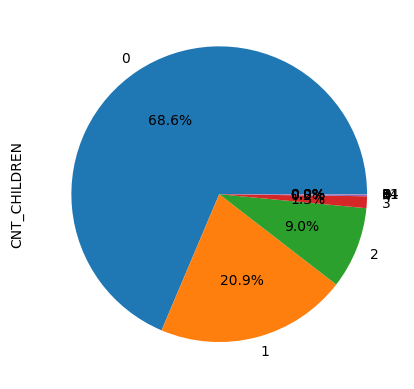

In [20]:
normalised_home_loan.CNT_CHILDREN.value_counts().plot(kind='pie',autopct="%1.1f%%")

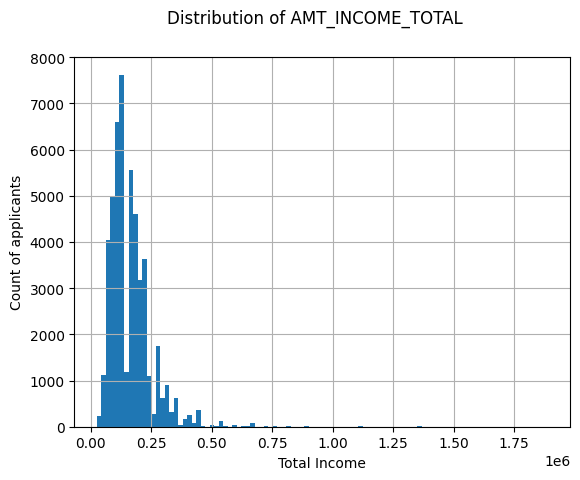

In [21]:
normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] < 2000000]['AMT_INCOME_TOTAL'].hist( bins=100)
plt.suptitle('Distribution of AMT_INCOME_TOTAL')
plt.xlabel('Total Income')
plt.ylabel('Count of applicants')
plt.show()


In [22]:
(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL']>1000000]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['AMT_INCOME_TOTAL'] > 1000000])*100

0    64.864865
1    35.135135
Name: TARGET, dtype: float64

In [23]:
#print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>1]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>2]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 2])*100)
print((normalised_home_loan[normalised_home_loan['CNT_CHILDREN']>5]['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CNT_CHILDREN'] > 5])*100) 
#With more no. of children it is more likely to default in loan payment 

1    57.047872
0    42.952128
Name: TARGET, dtype: float64
1    81.818182
0    18.181818
Name: TARGET, dtype: float64


In [24]:
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='N']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='N'])*100)
print((normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR']=='Y']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['FLAG_OWN_CAR'] =='Y'])*100) 
#people with own cars are slighlty more likely to repay back the loan 

1    51.350064
0    48.649936
Name: TARGET, dtype: float64
0    52.823962
1    47.176038
Name: TARGET, dtype: float64


In [25]:
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='M']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='M'])*100) 
print((normalised_home_loan[normalised_home_loan['CODE_GENDER']=='F']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['CODE_GENDER'] =='F'])*100) 
#men are more likely to default in payment of loans

1    56.280372
0    43.719628
Name: TARGET, dtype: float64
0    53.867691
1    46.132309
Name: TARGET, dtype: float64


In [26]:
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Cash loans'])*100) 
print((normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans']['TARGET'].value_counts())/len(normalised_home_loan[normalised_home_loan['NAME_CONTRACT_TYPE']=='Revolving loans'])*100) 
#cash loans have a higher percent of defaulters

1    50.802923
0    49.197077
Name: TARGET, dtype: float64
0    59.309995
1    40.690005
Name: TARGET, dtype: float64


6. Encode the columns that is required for the model

In [27]:
from sklearn.preprocessing import OrdinalEncoder

ordenc=OrdinalEncoder()
normalised_home_loan['NAME_CONTRACT_TYPE_CODE']=ordenc.fit_transform(normalised_home_loan[['NAME_CONTRACT_TYPE']]) 
print(normalised_home_loan[['NAME_CONTRACT_TYPE','NAME_CONTRACT_TYPE_CODE']].head(20))
print(normalised_home_loan['NAME_CONTRACT_TYPE_CODE'].value_counts())

       NAME_CONTRACT_TYPE  NAME_CONTRACT_TYPE_CODE
207339         Cash loans                      0.0
8756           Cash loans                      0.0
230344         Cash loans                      0.0
178329         Cash loans                      0.0
55586          Cash loans                      0.0
65695          Cash loans                      0.0
263860         Cash loans                      0.0
10539          Cash loans                      0.0
56254          Cash loans                      0.0
12152          Cash loans                      0.0
13694          Cash loans                      0.0
16621          Cash loans                      0.0
256753         Cash loans                      0.0
112693         Cash loans                      0.0
296306         Cash loans                      0.0
34526          Cash loans                      0.0
31848          Cash loans                      0.0
242007         Cash loans                      0.0
48541          Cash loans      

In [28]:
normalised_home_loan['CODE_GENDER_CODE']=ordenc.fit_transform(normalised_home_loan[['CODE_GENDER']]) 
print(normalised_home_loan[['CODE_GENDER','CODE_GENDER_CODE']].head(20))
print(normalised_home_loan['CODE_GENDER_CODE'].value_counts())

       CODE_GENDER  CODE_GENDER_CODE
207339           F               0.0
8756             M               1.0
230344           F               0.0
178329           M               1.0
55586            M               1.0
65695            F               0.0
263860           M               1.0
10539            M               1.0
56254            F               0.0
12152            F               0.0
13694            F               0.0
16621            F               0.0
256753           F               0.0
112693           M               1.0
296306           F               0.0
34526            M               1.0
31848            M               1.0
242007           F               0.0
48541            F               0.0
294012           M               1.0
0.0    30716
1.0    18932
2.0        2
Name: CODE_GENDER_CODE, dtype: int64


In [29]:
#2 other values in code_gender
normalised_home_loan.loc[normalised_home_loan['CODE_GENDER_CODE']==2]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE_CODE,CODE_GENDER_CODE
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500.0,540000.0,27000.0,...,0,0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,2.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0


In [30]:
normalised_home_loan['FLAG_OWN_CAR_CODE']=ordenc.fit_transform(normalised_home_loan[['FLAG_OWN_CAR']]) 
print(normalised_home_loan[['FLAG_OWN_CAR','FLAG_OWN_CAR_CODE']].head(20))
print(normalised_home_loan['FLAG_OWN_CAR_CODE'].value_counts())

       FLAG_OWN_CAR  FLAG_OWN_CAR_CODE
207339            N                0.0
8756              Y                1.0
230344            N                0.0
178329            Y                1.0
55586             N                0.0
65695             N                0.0
263860            Y                1.0
10539             Y                1.0
56254             Y                1.0
12152             N                0.0
13694             N                0.0
16621             N                0.0
256753            Y                1.0
112693            N                0.0
296306            N                0.0
34526             N                0.0
31848             N                0.0
242007            N                0.0
48541             N                0.0
294012            N                0.0
0.0    33591
1.0    16059
Name: FLAG_OWN_CAR_CODE, dtype: int64


In [31]:
normalised_home_loan['CNT_CHILDREN_CODE']=ordenc.fit_transform(normalised_home_loan[['CNT_CHILDREN']]) 
print(normalised_home_loan[['CNT_CHILDREN_CODE','CNT_CHILDREN']].head(20))
print(normalised_home_loan['CNT_CHILDREN_CODE'].value_counts())

        CNT_CHILDREN_CODE  CNT_CHILDREN
207339                0.0             0
8756                  0.0             0
230344                0.0             0
178329                0.0             0
55586                 0.0             0
65695                 0.0             0
263860                0.0             0
10539                 0.0             0
56254                 0.0             0
12152                 0.0             0
13694                 0.0             0
16621                 2.0             2
256753                0.0             0
112693                0.0             0
296306                2.0             2
34526                 0.0             0
31848                 0.0             0
242007                0.0             0
48541                 0.0             0
294012                0.0             0
0.0     34073
1.0     10381
2.0      4444
3.0       642
4.0        89
5.0        10
6.0         6
8.0         2
9.0         1
10.0        1
7.0         1
Name: 

In [32]:
normalised_home_loan['TARGET'].value_counts()

1    24825
0    24825
Name: TARGET, dtype: int64

In [33]:
y=normalised_home_loan.TARGET 
normalised_home_loan_features=['SK_ID_CURR','NAME_CONTRACT_TYPE_CODE','CNT_CHILDREN_CODE','FLAG_OWN_CAR_CODE','CODE_GENDER_CODE']
X=normalised_home_loan[normalised_home_loan_features] 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
'''
The make_blobs() function can be used to generate blobs of points with a Gaussian distribution.
You can control how many blobs to generate and the number of samples to generate, as well as a host of other properties.
'''
blobs_random_seed = 42
centers = [(0,0), (5,5)]
cluster_std = 1
frac_test_split = 0.33
num_features_for_samples = 2
num_samples_total = 49650

# Generate data
inputs, targets = make_blobs(n_samples = num_samples_total, centers = centers, n_features = num_features_for_samples, cluster_std = cluster_std)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=45)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33265, 5) (16385, 5) (33265,) (16385,)


In [35]:

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [36]:
#from sklearn.svm import SVC
#clf = SVC(kernel='linear',probability=True)

from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()

In [37]:
clf=clf.fit(X_train,y_train)

In [38]:
predictions = clf.predict(X_test)

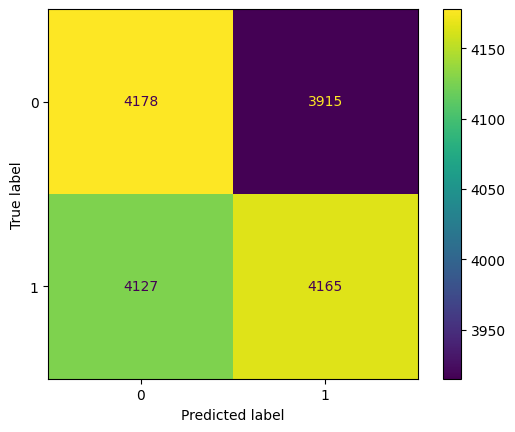

In [39]:
# Generate confusion matrix
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

7. Calculate Sensitivity as a metrice

In [40]:
from sklearn.metrics import recall_score

In [41]:
print(f"Sensitivity :{0} ",recall_score(y_test, predictions)) 
#Ratio of true positives to total (actual) positives in the data

Sensitivity :0  0.5022913651712494


In [42]:
'''support_vectors = clf.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
'''

"support_vectors = clf.support_vectors_\n\n# Visualize support vectors\nplt.scatter(X_train[:,0], X_train[:,1])\nplt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')\nplt.title('Linearly separable data with support vectors')\nplt.xlabel('X1')\nplt.ylabel('X2')\nplt.show()\n"

In [43]:
'''from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, clf=clf, legend=2)
plt.show()
'''

'from mlxtend.plotting import plot_decision_regions\nplot_decision_regions(X_test, y_test, clf=clf, legend=2)\nplt.show()\n'

8. Calculate area under receiver operating characteristics curve

In [44]:
# Compute AUC score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, predictions)
auc_score

0.509269987540524

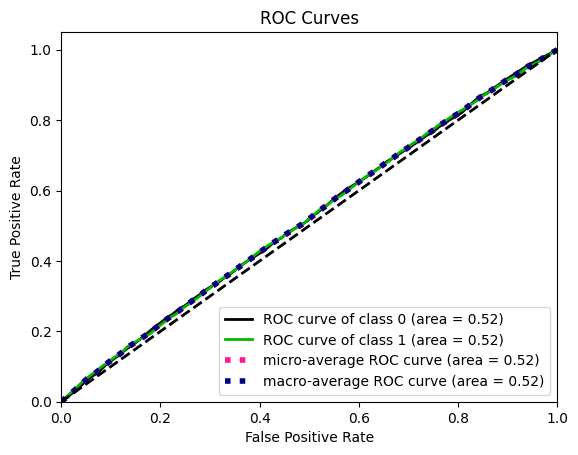

In [45]:
import scikitplot as skplt
y_true = y_test
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.519


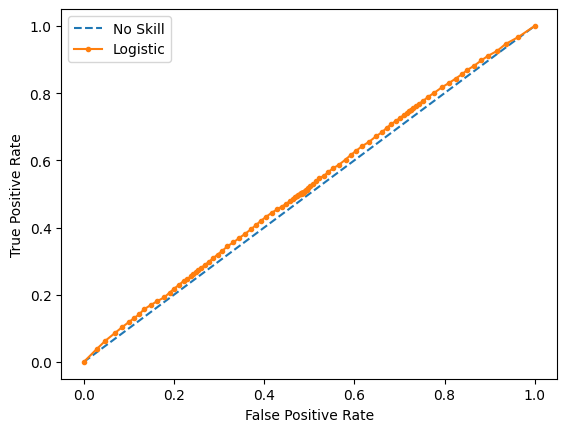

In [46]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()